
In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Wednesday Jan 30th**.  Students must come to class the next day prepared to discuss the material covered in this assignment. 

# Pre-Class Assignment: Robotics and Reference Frames


</p>


<img src="http://www.fanuc.com/product/image/m2000ia.jpg" width="25%">
<p style="text-align: right;">Image from: http://www.fanuc.com/</p>




# Goals for today's pre-class assignment 

1. Review
1. 2D Forward Kinematics
1. Assignment Wrap-up

Reference: https://studywolf.wordpress.com/2013/08/21/robot-control-forward-transformation-matrices/


# 1. Review

 <font color=red>**QUESTION 1:**</font>  Matrix $A$ is of size ($n_1 \times m_1$) and matrix B is of size ($n_2 \times m_2$).  What must be true about the dimensions in order to multiply $A \times B$?  

$ m_1$ = $n_2$

<font color=red>**QUESTION 2:**</font> The following transformation matrix will move points in $R^n$ dimensional space. What is $n$?

$$
\left[
\begin{matrix}
    \sin{(\theta)} & -\cos{(\theta)} & 0 & d_x \\ 
    \cos{(\theta)} & \sin{(\theta)}  & 0 & d_y \\ 
    0 & 0  & 1 & d_z \\ 
    0 & 0  & 0 & 1 
\end{matrix}
\right] 
$$

n = 3

&#9989; <font color=red>**QUESTION 3:**</font>  The above matrix rotates around which axis?

About the origin clockwise

<font color=red>**QUESTION 4:**</font> In the above matrix, how do the scalar values $d_x, d_y, d_z$ influence the transformation? 

translation in each axis x,y,z

<font color=red>**QUESTION 5:**</font>  Compute $2u+3v$ for vectors $u = (1,2, 6)$ and $v = (4, -1, 3)$.

In [1]:
import numpy as np

u = np.array([1,2,6])
v = np.array([4,-1,3])

2*u+3*v

array([14,  1, 21])

<font color=red>**QUESTION 6:**</font>  What is a homogeneous system of linear equations?

If all of the constant terms are zero

----
# 2. 2D Forward Kinematics


Read the Reference: https://studywolf.wordpress.com/2013/08/21/robot-control-forward-transformation-matrices/


Consider the following example robot with two joints ($q_1$ and $q_2$):


<img src="https://studywolf.files.wordpress.com/2013/08/robot-arm12.png" width="25%">

This robot can move in the $xy$ plane.  We can represent the configuration of the robot in it's "*Joint Space*" by knowing the two joint angles or $q = [q_1,q_2]$.  However what we would like is to represent the location of the end of the robot (often called the "end effector" or "hand") in "world" coordinates (i.e. $x,y$ coordinate system). 

In this pre-class assignment we will use Linear Algebra and simple transformation matrices to try and calculate how to go from "joint" coordinates to "world" coordinates.  

## Single axis Robot

The following code draws a simple single axis (single joint) robot with its joint centered at the origin and its initial angle of zero with an robot arm length of 4 "units" long.

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact

(-5.5, 5.5)

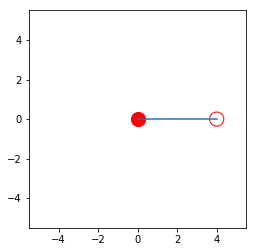

In [3]:
plt.scatter(4,0, s=200, facecolors='none', edgecolors='r') #plot end effector
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r') # plot origin
plt.plot([0,4],[0,0]) #plot blue line for arm
plt.axis('square')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])
    

Now what happens when we want to rotate the joint? In this case we use the rotation matrix described in the Willam's book on page2 119-120. This matrix looks like the following:


$$ 
\left[ \begin{matrix}
    x_{end} \\
    y_{end} 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    \cos(q) & -\sin(q) \\
    \sin(q) & \cos(q) 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_{start} \\
    y_{start} 
 \end{matrix}
\right] 
$$ 

The following rotation matrix will rotate the point $45^o$ around the origin:

(-5.5, 5.5)

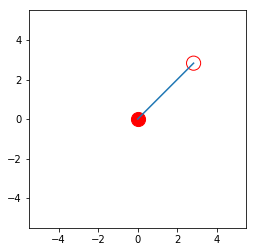

In [4]:
x = 4
y = 0

q1=np.pi/4

x1 = x * np.cos(q1) - y * np.sin(q1)
y1 = x * np.sin(q1) + y * np.cos(q1)

plt.scatter(x1,y1, s=200, facecolors='none', edgecolors='r') #plot end effector
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r') # plot origin
plt.plot([0,x1],[0,y1]) #plot blue line for arm
plt.axis('square')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

The following code uses the Jupyter ```interact``` function and ```numpy``` to make an interactive view of the above.  This lets us change the value of the rotation motors and see how it changes the robot. The input to the function is the axis angle and the output is the $x$ and $y$ coordinates.

**Note:** it can take some time for the interaction to catch up.  Try moving the slider slowly...

In [5]:
def Robot_Simulator(q1=0):
    a1 = q1/180  * np.pi
    p0 = np.matrix([4,0]).T
    p = p0
    J1 = np.matrix([[np.cos(a1), -np.sin(a1)], [np.sin(a1), np.cos(a1)]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0]).T), axis=1 )
    
    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=200, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=200, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.axis('square')
    plt.xlim([-5.5,5.5])
    plt.ylim([-5.5,5.5])
    ax = plt.gca()
    plt.show()
    return([ p[0,0], p[1,0] ])
    
p = interact(Robot_Simulator, q1=(-180,180,2));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180, step=2), Output()), _dom_classes…

&#9989; <font color=red>**QUESTION 7:**</font>  Inspect the above code. 
Which line of the code defines the transformation matrix for the robot joint?  
Which line of code defines the length of the arm? 
(Note you can turn line numbers on and off in jupyterhub. 
Use the menu at the top to figure out how.)

Line 5 - J1 = np.matrix([[np.cos(a1), -np.sin(a1)], [np.sin(a1), np.cos(a1)]]) 

Line 3 -  p0 = np.matrix([4,0]).T

## Multi axis robot

Now, let's make our robot a little more complex. 
Consider the following model for our robot:

<img src="https://studywolf.files.wordpress.com/2013/08/robot_coordinate_frames1.png" width="25%">

Notice it has two joints $q_1$ and $q_2$ and arm lengths of $d_1$ and $d_2$
Also notice that the first axis is no longer centered at the origin but shifted up a distance of $d_0$ and rotated 90 degrees. 
The joint space for this robot is still just its angles $q=[q_1, q_2]$. 
However, what we want is to know the location of point $p$ in the "world" reference frame, which is shown at the origin in blue.  

At each joint, we can define a reference frame that moves with that joint. 
The forward transformation matrices capture the relationship between the reference frames of different links of the robot. 

For example, We can move from the origin reference frame to the $q_1$ reference frame using the following equations:

$$ 
p_0
=
\left[ \begin{matrix}
    \cos(q_1) & -\sin(q_1) \\
    \sin(q_1) & \cos(q_1) 
 \end{matrix}
\right] 
p_1
+ 
\left[ \begin{matrix}
    0 \\
    d_0 
 \end{matrix}
\right].
$$ 

If we set $q = 90^o$, we would get the configuration for the joint shown above. 

The equation shown  above are a little tricky to work with because the$ \left[ \begin{matrix}
    0 \\
    d_0 
 \end{matrix}
\right] $ part makes the equation non-linear 
(if you don't believe me? 
Remember the rules for making a function linear and apply them and see for yourself). 
However, there is an easy trick in Linear Algebra to convert the above to one big linear matrix. 
This trick  requires us to keep around an extra 1 (one) for each point but makes the math work out nicely. 
Basically the trick works as follows:

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(q) & -sin(q) & dx \\
    sin(q) & cos(q) & dy \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    1 
 \end{matrix}
\right] 
$$ 

So we can rewrite the above equation as follows:

$$ 
\left[ \begin{matrix}
    x_0 \\
    y_0 \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(q_1) & -sin(q_1) & 0 \\
    sin(q_1) & cos(q_1) & d_0 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] 
$$ 

Let's call the transformation matrix for Joint 1, $J_1$, and we can rewrite the equations as follows:

$$p_0 = J_1p_1$$

<font color=red>**DO THIS**</font> On your own, write out the above matrix multiplication and convince yourself that it is the same as the one above. You do not need to record your answer.

Now, we can move from the $q_1$ reference frame to the $q2$ joint reference frame using a similar equation. This time we are moving relative to the $q_1$ angle so our offset is in the $x_1$ direction of the $q_1$ reference frame or along the first robot arm link:

$$ 
\left[ \begin{matrix}
    x_2 \\
    y_2 \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(q_2) & -sin(q_2) & d_1 \\
    sin(q_2) & cos(q_2) & 0 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] 
$$ 


Hopefully you can see that we can string these transformation matrices together such that:

$$p_0 = J_1J_2p_2$$



Let's see what this looks like in python.  I am going to use ```numpy```. The plotting gets a little ackward but hopefully it makes sense:


(-5.5, 5.5)

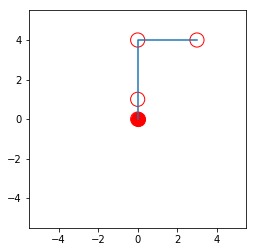

In [7]:
#inicial state

q1 = 0
q2 = 0

#pictured state
q1 = np.pi/2
q2 = -np.pi/2

d0 = 1
d1 = 3
d2 = 3

p = np.matrix([[d2, 0, 1],[0,0,1]]).T

J2 = np.matrix([[np.cos(q2), -np.sin(q2), d1], [np.sin(q2), np.cos(q2), 0], [0,0,1]]) 
p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

J1 = np.matrix([[np.cos(q1), -np.sin(q1), 0], [np.sin(q1), np.cos(q1), d0], [0,0,1]]) 
p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=200, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

And here is the robot simulator for the 2 joint robot:

In [13]:
from ipywidgets import interact

def Robot_Simulator(a1=90,a2=-90):
    q1 = a1/180  * np.pi
    q2 = a2/180  * np.pi

    d0 = 1
    d1 = 3
    d2 = 3
    target = np.matrix([-3,2, 1])
    print(target)

    p = np.matrix([[d2, 0, 1],[0,0,1]]).T

    J2 = np.matrix([[np.cos(q2), -np.sin(q2), d1], [np.sin(q2), np.cos(q2), 0], [0,0,1]]) 
    p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

    J1 = np.matrix([[np.cos(q1), -np.sin(q1), 0], [np.sin(q1), np.cos(q1), d0], [0,0,1]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )


    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=200, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=200, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.plot(target[0,0], target[0,1],'*')
    plt.axis('scaled')
    plt.xlim([-5.5,5.5])
    plt.ylim([-5.5,5.5])

    plt.show()
    
target = interact(Robot_Simulator, a1=(-180,180), a2=(-180,180));

interactive(children=(IntSlider(value=90, description='a1', max=180, min=-180), IntSlider(value=-90, descripti…

**Question:** Move the above robot so that the end effector is "gripping" the target (yellow/orangeish star). 
Notice that there is more than one point in the "joint space" that gives the same answer. 
This is the reverse Kinematic problem (which is harder). 
We know the point we want but we need to find the joints that put the robot at that point. 

$$ a1 = 102 $$
$$ a2 = 117 $$

** &#9989; Do This:** The code in the following cell is cut and pasted from above. Modify the code to add a third Joint to the robot.

In [11]:
def Robot_Simulator(a1=90,a2=-90, a3=90):
    q1 = a1/180  * np.pi
    q2 = a2/180  * np.pi
    q3 = a3/180  * np.pi
    
    d1 = 1
    d2 = 3
    d3 = 1
    
    target = np.matrix([-3,2, 1])
    print(target)

    p = np.matrix([[d2, 0, 1],[0,0,1]]).T

    J3 = np.matrix([[np.cos(q3), -np.sin(q3), 0], [np.sin(q3), np.cos(q3), d3], [0,0,1]]) 
    p = np.concatenate( ( J3*p, np.matrix([0,0,1]).T), axis=1 )
    
    J2 = np.matrix([[np.cos(q2), -np.sin(q2), d2], [np.sin(q2), np.cos(q2), 0], [0,0,1]]) 
    p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

    J1 = np.matrix([[np.cos(q1), -np.sin(q1), 0], [np.sin(q1), np.cos(q1), d1], [0,0,1]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )

    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=200, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=200, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.plot(target[0,0], target[0,1],'*')
    plt.axis('square')
    plt.xlim([-5.5,5.5])
    plt.ylim([-5.5,5.5])

    plt.show()
    
target = interact(Robot_Simulator, a1=(-180,180), a2=(-180,180), a3=(-180,180)); ##TODO: Modify this line of code

interactive(children=(IntSlider(value=90, description='a1', max=180, min=-180), IntSlider(value=-90, descripti…

<font color=red>**QUESTION 8:**</font>   Do the reverse Kinematics again, and find three angles that place the robot on the star. 

$$ a1 = 94 $$
$$ a2 = -27 $$
$$ a3 = 161 $$


----
# 3. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


[Direct Link](https://docs.google.com/forms/d/e/1FAIpQLScz6v7GDWkQzfyC-Gvy52HA3wMU0rtFj3ru34AwFWp254OmVQ/viewform)

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLScz6v7GDWkQzfyC-Gvy52HA3wMU0rtFj3ru34AwFWp254OmVQ/viewform?embedded=true" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

-----
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above Google From on or before the assignment due date.


&#169; Copyright 2017,  Michigan State University Board of Trustees